In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# code to ignore warnings
import warnings
warnings.filterwarnings("ignore")
# uses the pandas library to read the file
df = pd.read_csv('DUK.csv')
# sets the date column as the index and converts it to the datetime format
df.index = pd.to_datetime(df['Date'])
# drops the original date colum since it is now the index
df = df.drop(['Date'], axis='columns')
# display the final dataframe without the index
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-08-28,90.589996,91.169998,90.000000,90.019997,86.314125,2128800
2023-08-29,90.000000,90.959999,89.949997,90.290001,86.573013,2279700
2023-08-30,90.010002,90.830002,89.470001,89.949997,86.247002,2250900
2023-08-31,90.260002,90.430000,88.720001,88.800003,85.144356,3139600
2023-09-01,89.250000,89.629997,87.500000,87.930000,84.310173,3777700
...,...,...,...,...,...,...
2024-08-20,112.910004,113.410004,112.099998,112.379997,112.379997,2822600
2024-08-21,112.370003,113.160004,112.260002,112.730003,112.730003,2798600
2024-08-22,112.660004,112.680000,111.449997,112.120003,112.120003,5459600


Final ending value for the red graph (Stock): 1.1213855688199361
Final ending value for the blue graph (Strategy): 1.1213855688199361
The strategy (blue graph) is better than the stock (red graph) by approximately 0.00%


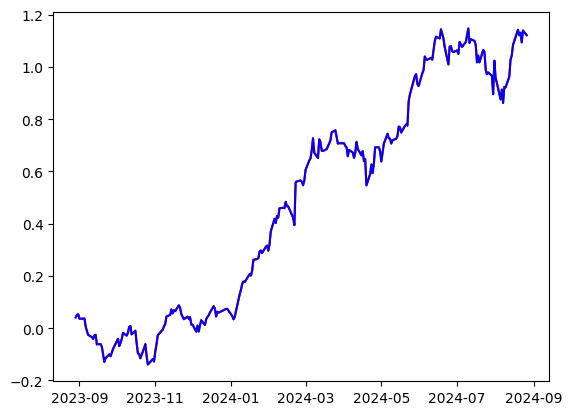

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv('NVDA.csv')
df
df.index = pd.to_datetime(df['Date'])
df
df = df.drop(['Date'], axis='columns')
df
df['Open-Close'] = df.Open - df.Close
df['High-Low'] = df.High - df.Low
# target vars for x
# x will contain values for opening and closing, highs and lows.
# these are indicators which will be used for the prediction
X = df[['Open-Close', 'High-Low']]
X.head()
# target vars for y
# is the boolean value (1/0)
# if the sv m function's PREDICTED value for tomorrow is higher than today's
# value of y will be set to 1
# and program will buy set amount of the stock
y = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
y

split_percentage = 0.8
split = int(split_percentage*len(df))
#splitting into training and testing
# to compare effectiveness
# Train data set
X_train = X[:split]
y_train = y[:split]

# Test data set
X_test = X[split:]
y_test = y[split:]

#finally, we use the SVM function of sklearn to run the program
cls = SVC().fit(X_train, y_train)
df['Predicted_Signal'] = cls.predict(X)
# Calculate daily returns
df['Return'] = df.Close.pct_change()
# Calculate strategy returns
df['Strategy_Return'] = df.Return *df.Predicted_Signal.shift(1)
# Calculate Cumulutive returns
df['Cum_Ret'] = df['Return'].cumsum()
df
# Plot Strategy Cumulative returns
df['Cum_Strategy'] = df['Strategy_Return'].cumsum()
df

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(df['Cum_Ret'],color='red')
plt.plot(df['Cum_Strategy'],color='blue')

#final function to compare values
def compreturns(df):
    final_stock_return = df['Cum_Ret'].iloc[-1]
    final_strategy_return = df['Cum_Strategy'].iloc[-1]
    print("Final ending value for the red graph (Stock):", final_stock_return)
    print("Final ending value for the blue graph (Strategy):", final_strategy_return)
    percentage_increase = ((final_strategy_return - final_stock_return) / abs(final_stock_return)) * 100
    print("The strategy (blue graph) is better than the stock (red graph) by approximately {:.2f}%".format(percentage_increase))

compreturns(df)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")  # ignores warnings to avoid cluttering output

# loads and preprocesses the stock data
df = pd.read_csv('BABA.csv')
df.index = pd.to_datetime(df['Date'])
df = df.drop(['Date'], axis='columns')

# sets features open-close and high-low
df['Open-Close'] = df.Open - df.Close
df['High-Low'] = df.High - df.Low

# defines features and target var
X = df[['Open-Close', 'High-Low']]
y = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

# split data into train and test
split_percentage = 0.8 #80% training data
split = int(split_percentage * len(df))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

# trains the  model
cls = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 trees
cls.fit(X_train, y_train)
df['Predicted_Signal'] = cls.predict(X)  # predicts signals for all data points
df['Return'] = df.Close.pct_change()  # calculates daily returns as a percentage change
df['Strategy_Return'] = df.Return * df.Predicted_Signal.shift(1)


df['Cum_Ret'] = df['Return'].cumsum()  # cumulative return of holding stock
df['Cum_Strategy'] = df['Strategy_Return'].cumsum()  # cumulative return of strategy

# plotting data on graphs
plt.figure(figsize=(10, 5))
plt.plot(df['Cum_Ret'], color='red', label='Stock Return')
plt.plot(df['Cum_Strategy'], color='blue', label='Strategy Return')
plt.legend()
plt.show()

# final function to make comparisons
def compreturns(df):
    final_stock_return = df['Cum_Ret'].iloc[-1]
    final_strategy_return = df['Cum_Strategy'].iloc[-1]
    print("Final ending value for the red graph (Stock):", final_stock_return)
    print("Final ending value for the blue graph (Strategy):", final_strategy_return)
    percentage_increase = ((final_strategy_return - final_stock_return) / abs(final_stock_return)) * 100
    print("The strategy (blue graph) is better than the stock (red graph) by approximately {:.2f}%".format(percentage_increase))

compreturns(df)  # calls comparison function


FileNotFoundError: [Errno 2] No such file or directory: 'BABA.csv'

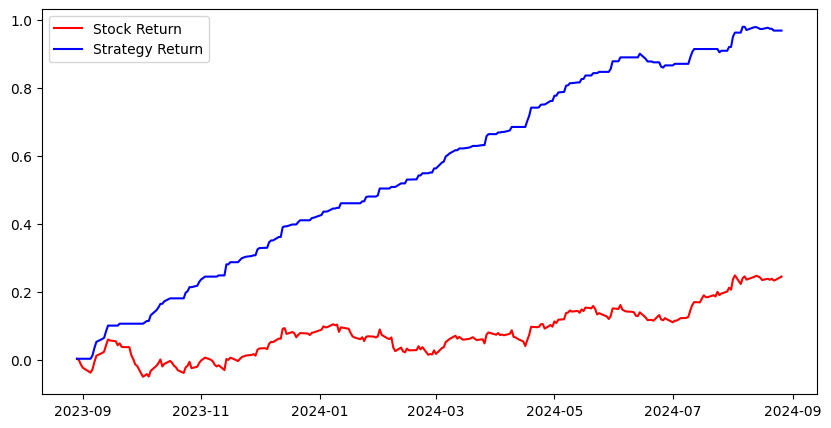

Final ending value for the red graph (Stock): 0.24475329229499865
Final ending value for the blue graph (Strategy): 0.9685151854162085
The strategy (blue graph) is better than the stock (red graph) by approximately 295.71%


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# loads and preprocesses data
df = pd.read_csv('DUK.csv')
df.index = pd.to_datetime(df['Date'])
df = df.drop(['Date'], axis='columns')

# Feature engineering
df['Open-Close'] = df.Open - df.Close
df['High-Low'] = df.High - df.Low

# Define features and target
X = df[['Open-Close', 'High-Low']]
y = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

# Split data into training and testing sets
split_percentage = 0.8
split = int(split_percentage * len(df))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

# Train Random Forest model
cls = RandomForestClassifier(n_estimators=100, random_state=42)
cls.fit(X_train, y_train)
df['Predicted_Signal'] = cls.predict(X)

# Calculate daily returns
df['Return'] = df.Close.pct_change()

# Calculate strategy returns
df['Strategy_Return'] = df.Return * df.Predicted_Signal.shift(1)

# Calculate cumulative returns
df['Cum_Ret'] = df['Return'].cumsum()
df['Cum_Strategy'] = df['Strategy_Return'].cumsum()

# Plot cumulative returns
plt.figure(figsize=(10, 5))
plt.plot(df['Cum_Ret'], color='red', label='Stock Return')
plt.plot(df['Cum_Strategy'], color='blue', label='Strategy Return')
plt.legend()
plt.show()

# Function to compare returns
def compreturns(df):
    final_stock_return = df['Cum_Ret'].iloc[-1]
    final_strategy_return = df['Cum_Strategy'].iloc[-1]
    print("Final ending value for the red graph (Stock):", final_stock_return)
    print("Final ending value for the blue graph (Strategy):", final_strategy_return)
    percentage_increase = ((final_strategy_return - final_stock_return) / abs(final_stock_return)) * 100
    print("The strategy (blue graph) is better than the stock (red graph) by approximately {:.2f}%".format(percentage_increase))

compreturns(df)


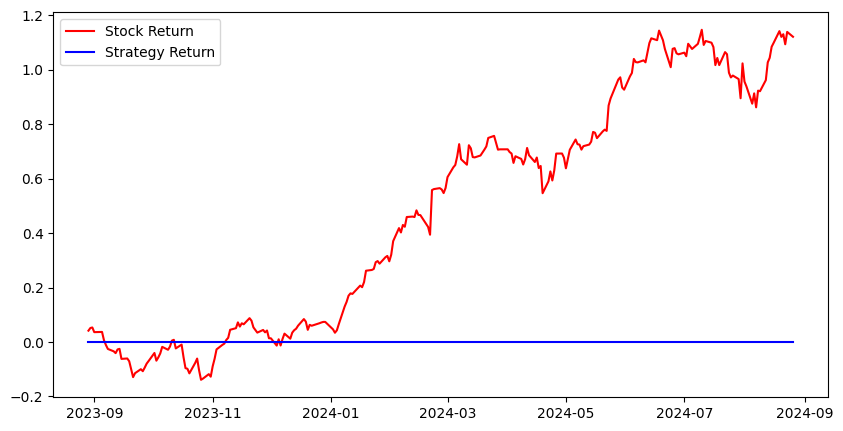

Final ending value for the red graph (Stock): 1.1213855688199361
Final ending value for the blue graph (Strategy): 0.0
The strategy (blue graph) is better than the stock (red graph) by approximately -100.00%


In [ ]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import warnings
# warnings.filterwarnings("ignore")

# load data and make features
df = pd.read_csv('NVDA.csv')
df.index = pd.to_datetime(df['Date'])
df = df.drop(['Date'], axis='columns')
df['Open-Close'] = df.Open - df.Close
df['High-Low'] = df.High - df.Low
X = df[['Open-Close', 'High-Low']]
y = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

# split into train and test
split_percentage = 0.8
split = int(split_percentage * len(df))
X_train = X[:split]x`
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

# train the logistic model
lr = LogisticRegression()
lr.fit(X_train, y_train)
# df['Predicted_Signal'] = lr.predict(X)
# commented out after the threshold change was made

# threshold
threshold = 0.8
probabilities = lr.predict_proba(X)[:, 1]  # gets probability for positives
df['Predicted_Signal'] = np.where(probabilities > threshold, 1, 0)

# calculate returns
df['Return'] = df.Close.pct_change()
df['Strategy_Return'] = df.Return * df.Predicted_Signal.shift(1)
df['Cum_Ret'] = df['Return'].cumsum()
df['Cum_Strategy'] = df['Strategy_Return'].cumsum()
# plot graph
plt.figure(figsize=(10, 5))
plt.plot(df['Cum_Ret'], color='red', label='Stock Return')
plt.plot(df['Cum_Strategy'], color='blue', label='Strategy Return')
plt.legend()
plt.show()

# compare returns
def compreturns(df):
    final_stock_return = df['Cum_Ret'].iloc[-1]
    final_strategy_return = df['Cum_Strategy'].iloc[-1]
    print("Final ending value for the red graph (Stock):", final_stock_return)
    print("Final ending value for the blue graph (Strategy):", final_strategy_return)
    percentage_increase = ((final_strategy_return - final_stock_return) / abs(final_stock_return)) * 100
    print("The strategy (blue graph) is better than the stock (red graph) by approximately {:.2f}%".format(percentage_increase))

compreturns(df)

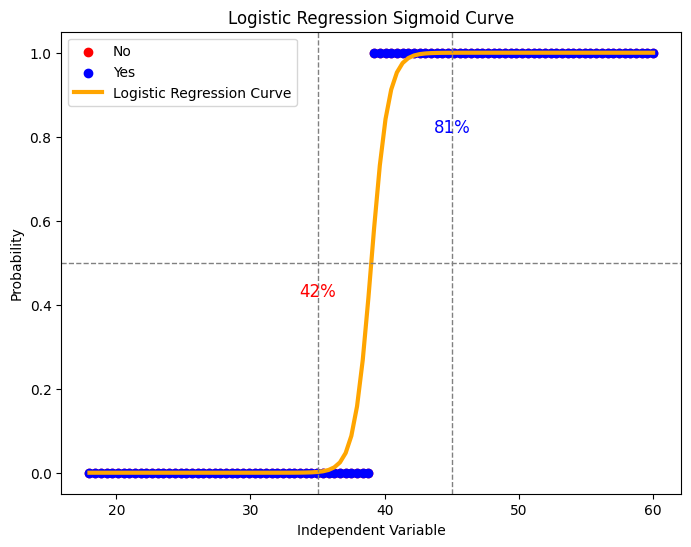

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Generate synthetic data for illustration
# np.random.seed(2)
X = np.linspace(18, 60, 100)  # independent variable
y = np.array([0] * 50 + [1] * 50)  # binary target variable
X = X.reshape(-1, 1)

# Logistic Regression model
lr = LogisticRegression()
lr.fit(X, y)

# Predict probabilities
probabilities = lr.predict_proba(X)[:, 1]

# Plotting the logistic regression curve
plt.figure(figsize=(8, 6))

# Plot the data points
plt.scatter(X, y, color='red', label='No', marker='o')
plt.scatter(X, probabilities >= 0.5, color='blue', label='Yes', marker='o')

# Plot the logistic regression curve
plt.plot(X, probabilities, color='orange', linewidth=3, label='Logistic Regression Curve')

# Annotate the key points
plt.axhline(y=0.5, color='gray', linestyle='--', linewidth=1)
plt.axvline(x=35, color='gray', linestyle='--', linewidth=1)
plt.axvline(x=45, color='gray', linestyle='--', linewidth=1)

# Mark probabilities for specific x-values
plt.text(35, 0.42, '42%', fontsize=12, color='red', ha='center')
plt.text(45, 0.81, '81%', fontsize=12, color='blue', ha='center')

# Axis labels and title
plt.xlabel('Independent Variable')
plt.ylabel('Probability')
plt.title('Logistic Regression Sigmoid Curve')

# Legend
plt.legend()

# Show plot
plt.show()


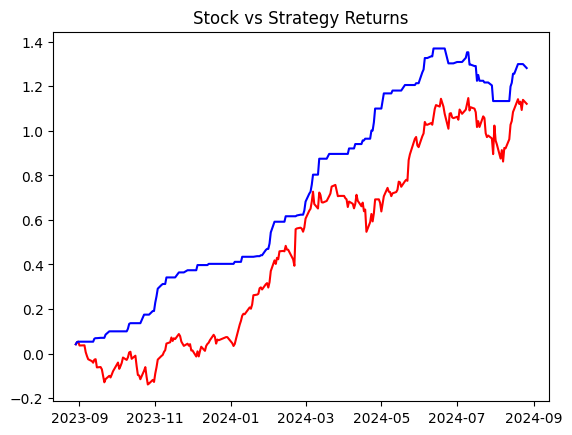

Final ending value for the red graph (Stock): 1.1213855688199361
Final ending value for the blue graph (Strategy): 1.2818935581643571
The strategy (blue graph) is better than the stock (red graph) by approximately 14.31%


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# scrape data
df = pd.read_csv('NVDA.csv')
df.index = pd.to_datetime(df['Date'])
df = df.drop(['Date'], axis='columns')

# feature engineering
df['Open-Close'] = df.Open - df.Close
df['High-Low'] = df.High - df.Low
# define matrix x and target var Y
X = df[['Open-Close', 'High-Low']]
y = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
# split into test and train
split_percentage = 0.8
split = int(split_percentage * len(df))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

# train the sklearn KNN classifier
knn = KNeighborsClassifier(n_neighbors=2).fit(X_train, y_train)
# predict signals & calculate all returns
df['Predicted_Signal'] = knn.predict(X)
df['Return'] = df.Close.pct_change()
df['Strategy_Return'] = df.Return * df.Predicted_Signal.shift(1)
df['Cum_Ret'] = df['Return'].cumsum()
df['Cum_Strategy'] = df['Strategy_Return'].cumsum()
plt.plot(df['Cum_Ret'], color='red')
plt.plot(df['Cum_Strategy'], color='blue')
plt.title("Stock vs Strategy Returns")
plt.show()

# compare final returns
def compreturns(df):
    final_stock_return = df['Cum_Ret'].iloc[-1]
    final_strategy_return = df['Cum_Strategy'].iloc[-1]
    print("Final ending value for the red graph (Stock):", final_stock_return)
    print("Final ending value for the blue graph (Strategy):", final_strategy_return)
    percentage_increase = ((final_strategy_return - final_stock_return) / abs(final_stock_return)) * 100
    print("The strategy (blue graph) is better than the stock (red graph) by approximately {:.2f}%".format(percentage_increase))

compreturns(df)
